Importando as bibliotecas necessárias


In [107]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Plotando uma imagem, em boa resolução, que apresenta o corpo inteiro de uma pessoa.

In [143]:
url = 'https://cdn.pixabay.com/photo/2016/08/05/18/44/softball-1572951_960_720.jpg'

In [144]:
def plotar_imagem_original(url):
  response = requests.get(url, stream=True)
  img = Image.open(response.raw)
  plt.figure(figsize=(10,20))
  plt.imshow(img)
  return img

**Fonte:** Keith Johnston. Pixabay. 2016. Disponível em: <https://pixabay.com/pt/photos/softbol-primeira-base-menina-1572951/>. Acesso em: 20 abr. 2020

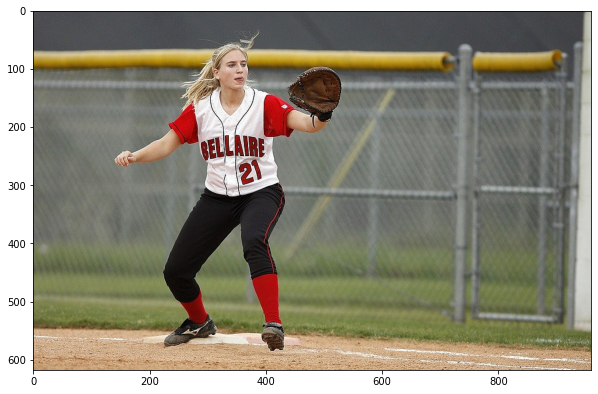

In [152]:
img = plotar_imagem_original(url)

O código abaixo permite a obtenção das coordenadas X e Y de cada parte do corpo apresentado na imagem anterior.

In [153]:
def obter_coordenadas(url):
  
  resposta = requests.get("http://poseestimation.herokuapp.com/estimate?url=" + url)

  pontos = np.array(resposta.json())

  pontoX = np.zeros((17,1), dtype=float)
  pontoY = np.zeros((17,1), dtype=float)

  contador = 0
  for i in range(0, (len(pontos)-1), 2):
    pontoX[contador] = float(pontos[i])
    contador = contador + 1

  contador = 0
  for i in range(1, (len(pontos)), 2):
    pontoY[contador] = float(pontos[i])
    contador = contador + 1
  return pontoX, pontoY

In [154]:
pontoX, pontoY = obter_coordenadas(url)

In [157]:
def plotar_imagem_esqueleto(pontoX, pontoY, cor_esqueleto, img):
  cor = cor_esqueleto
  plt.figure(figsize=(10,20))
  plt.imshow(img)
  for i in range(0,17):
    plt.plot(pontoX, pontoY, "o", color=cor)


  plt.plot([pontoX[5], pontoX[6]], [pontoY[5], pontoY[6]], color=cor)
  plt.plot([pontoX[5], pontoX[7]], [pontoY[5], pontoY[7]], color=cor)
  plt.plot([pontoX[5], pontoX[11]], [pontoY[5], pontoY[11]], color=cor)
  plt.plot([pontoX[6], pontoX[8]], [pontoY[6], pontoY[8]], color=cor)
  plt.plot([pontoX[6], pontoX[12]], [pontoY[6], pontoY[12]], color=cor)
  plt.plot([pontoX[7], pontoX[9]], [pontoY[7], pontoY[9]], color=cor)
  plt.plot([pontoX[8], pontoX[10]], [pontoY[8], pontoY[10]], color=cor)
  plt.plot([pontoX[11], pontoX[12]], [pontoY[11], pontoY[12]], color=cor)
  plt.plot([pontoX[11], pontoX[13]], [pontoY[11], pontoY[13]], color=cor)
  plt.plot([pontoX[12], pontoX[14]], [pontoY[12], pontoY[14]], color=cor)
  plt.plot([pontoX[13], pontoX[15]], [pontoY[13], pontoY[15]], color=cor)
  plt.plot([pontoX[14], pontoX[16]], [pontoY[14], pontoY[16]], color=cor)

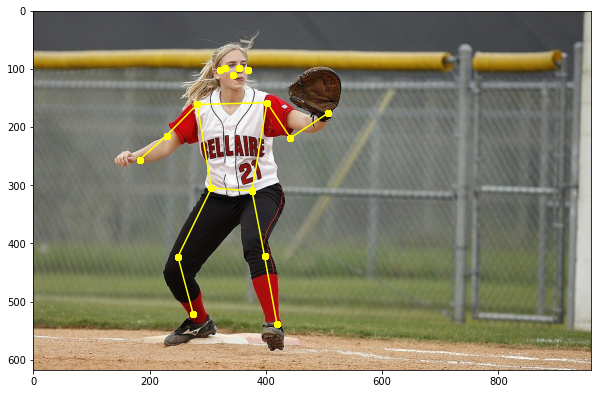

In [159]:
plotar_imagem_esqueleto(pontoX, pontoY, 'yellow', img)